In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.losses import KLDivergence, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau


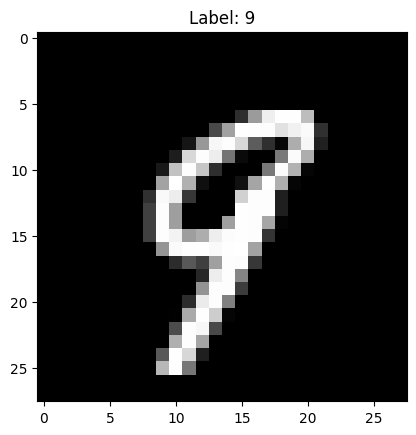

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine training and test datasets to get the full dataset
x_full = np.concatenate((x_train, x_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)


# Function to select a specified number of samples for each category
def select_samples(x, y, num_samples):
    selected_samples = []
    selected_labels = []
    for i in range(10):  # 10 categories in MNIST
        indices = np.where(y == i)[0][:num_samples]
        selected_samples.append(x[indices])
        selected_labels.append(y[indices])
    selected_samples = np.concatenate(selected_samples, axis=0)
    selected_labels = np.concatenate(selected_labels, axis=0)
    return selected_samples, selected_labels

# Select 1,000 samples for each category
x_subset, y_subset = select_samples(x_full, y_full, 1000)

# Display one random image from x_train_subset
index = np.random.randint(0, len(x_subset))
image = x_subset[index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_subset[index]}")
plt.show()

In [5]:
# Preparing data set i.e 100 labeled datas i.e 10 labeled from each category.
np.random.seed(0)
labeled_mask = np.zeros(10000, dtype=bool)
for i in range(10):
    indices = np.where(np.array(y_subset) == i)[0] # returns shuffled array of indices of each class, total 1000 data.
    np.random.shuffle(indices)
    labeled_mask[indices[:10]] = True


# Get the index of those data which are considered to be labelled and unlabelled.
labeled_dataset_to_be_trained_index = np.where(labeled_mask)[0]
unlabeled_dataset_index = np.where(~labeled_mask)[0]


# Get the actual data  by index which are considered to be labelled and unlabelled.
labeled_dataset_to_be_trained_x = np.array([x_subset[index]  for index in labeled_dataset_to_be_trained_index])
labeled_dataset_to_be_trained_y = np.array([y_subset[index]  for index in labeled_dataset_to_be_trained_index])

unlabeled_dataset_x = np.array([x_subset[index]  for index in unlabeled_dataset_index])
# unlabeled_dataset_y = np.array([y_subset[index]  for index in unlabeled_dataset_index])
unique_labels = np.unique([y for y in labeled_dataset_to_be_trained_y])

print('Shape of labeled dataset to be used for training inputs', labeled_dataset_to_be_trained_x.shape)
print('Shape of labeled dataset to be used for training labels', labeled_dataset_to_be_trained_y.shape)

Shape of labeled dataset to be used for training inputs (100, 28, 28)
Shape of labeled dataset to be used for training labels (100,)


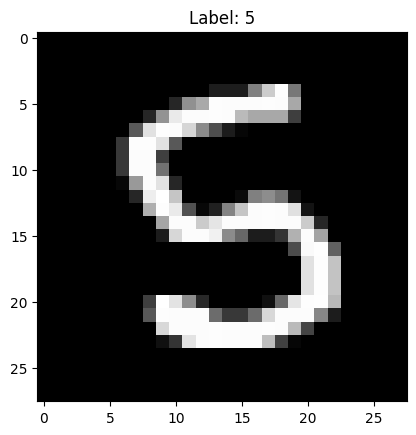

Shape of training data labels in one hot encode vector after splitting in 10%  (90, 10)
Shape of training data inputs after splitting in 10%  (90, 10)


In [7]:
## Plot plus splitting datasets

# Display one random image from x_train_subset
index = np.random.randint(0, len(labeled_dataset_to_be_trained_x))
image = labeled_dataset_to_be_trained_x[index]


# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labeled_dataset_to_be_trained_y[index]}")
plt.show()



# train_labels_one_hot_y = keras.utils.to_categorical(unique_labels, num_classes=10)

# Split the subset into training and testing sets
labeled_x_train_subset,labeled_x_test_subset, labeled_y_train_subset, labeled_y_test_subset = train_test_split(
    labeled_dataset_to_be_trained_x, labeled_dataset_to_be_trained_y, test_size=0.1, random_state=42
)

train_labels_y = keras.utils.to_categorical(labeled_y_train_subset, num_classes=10)
test_labels_y = keras.utils.to_categorical(labeled_y_test_subset, num_classes=10)


print('Shape of training data labels in one hot encode vector after splitting in 10% ', train_labels_y.shape)
print('Shape of training data inputs after splitting in 10% ', train_labels_y.shape)




In [8]:
# Build the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset, test_labels_y))
model.fit(labeled_x_train_subset, train_labels_y , epochs=100, batch_size=20)

print(labeled_x_test_subset.shape)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset, test_labels_y)
test_loss_ul, test_acc_ul = model.evaluate(unlabeled_dataset_x)

print('\nTest accuracy:', test_acc)
print('\nTest accuracy for unlabeled data set:', test_acc_ul)


Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 194.0900 - accuracy: 0.1222
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 101.0935 - accuracy: 0.2889
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 66.6839 - accuracy: 0.3667
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 43.6076 - accuracy: 0.5556
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 21.7253 - accuracy: 0.6556
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 16.7318 - accuracy: 0.7222
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 6.7951 - accuracy: 0.8556
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 4.2669 - accuracy: 0.8778
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 5.7025 - accuracy: 0.8889
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 4.2592 - accuracy: 0.9000
Epoch 11/100
5/5 [===

In [9]:
# Virtual Adversarial Training
x = labeled_x_train_subset

def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d


r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
# r =  generate_random_unit_vector(r)
perturbed_input = labeled_x_train_subset+0.01*r

model_vat = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_vat.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


def virtual_adversarial_loss(x, logits):
    d = generate_random_unit_vector(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        logits_perturbed = model_vat(x + alpha * d)
        loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    r_vadv = tape.gradient(loss, x)
    r_vadv_normalized = alpha * r_vadv / tf.norm(r_vadv)

    logits_perturbed = model_vat(x + r_vadv_normalized)
    loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    return loss



epochs = 20
batch_size = 20

for epoch in range(epochs):
    for i in range(0, len(perturbed_input), batch_size):
        x_batch = perturbed_input[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_vat(x_batch)
            classification_loss = tf.keras.losses.categorical_crossentropy(y_batch, logits)
            vat_loss = virtual_adversarial_loss(x_batch, logits)
            total_loss = classification_loss + vat_loss
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_vat.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for VAT:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_vat.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_vat = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_vat.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_vat)
print("Accuracy on unlabeled dataset:", accuracy_unlabeled)



Epoch [1/20], Step [81/80] Total Loss: 75.1646
Epoch [2/20], Step [81/80] Total Loss: 61.8200
Epoch [3/20], Step [81/80] Total Loss: 8.7786
Epoch [4/20], Step [81/80] Total Loss: 6.0568
Epoch [5/20], Step [81/80] Total Loss: 0.0000
Epoch [6/20], Step [81/80] Total Loss: 0.0000
Epoch [7/20], Step [81/80] Total Loss: 0.0000
Epoch [8/20], Step [81/80] Total Loss: 0.0000
Epoch [9/20], Step [81/80] Total Loss: 0.0000
Epoch [10/20], Step [81/80] Total Loss: 0.0000
Epoch [11/20], Step [81/80] Total Loss: 0.0000
Epoch [12/20], Step [81/80] Total Loss: 0.0000
Epoch [13/20], Step [81/80] Total Loss: 0.0000
Epoch [14/20], Step [81/80] Total Loss: 0.0000
Epoch [15/20], Step [81/80] Total Loss: 0.0000
Epoch [16/20], Step [81/80] Total Loss: 0.0000
Epoch [17/20], Step [81/80] Total Loss: 0.0000
Epoch [18/20], Step [81/80] Total Loss: 0.0000
Epoch [19/20], Step [81/80] Total Loss: 0.0000
Epoch [20/20], Step [81/80] Total Loss: 0.0000
1/1 [==============================] - 0s 236ms/step - loss: 32.809

In [10]:
# Entropy minimization
x = labeled_x_train_subset

model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_entropy_minimization.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    # print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    # print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    epsilon = 1e-10
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred + epsilon), axis=1)
    # print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss




epochs = 20
batch_size = 20

for epoch in range(epochs):
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_entropy_minimization(x_batch)
            total_loss = entropy_minimization_loss(y_batch,logits )
        gradients = tape.gradient(total_loss, model_entropy_minimization.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_entropy_minimization.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for Entropy minimization:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_entropy_minimization.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_entropy_minimization = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_entropy_minimization.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_entropy_minimization)
print("Accuracy on unlabeled dataset for entropy minimization:", accuracy_unlabeled)



Epoch [1/20], Step [81/80] Total Loss: 62.3311
Epoch [2/20], Step [81/80] Total Loss: 26.9614
Epoch [3/20], Step [81/80] Total Loss: 4.2976
Epoch [4/20], Step [81/80] Total Loss: 0.0000
Epoch [5/20], Step [81/80] Total Loss: 0.0000
Epoch [6/20], Step [81/80] Total Loss: 0.0000
Epoch [7/20], Step [81/80] Total Loss: 0.0000
Epoch [8/20], Step [81/80] Total Loss: 0.0000
Epoch [9/20], Step [81/80] Total Loss: 0.0000
Epoch [10/20], Step [81/80] Total Loss: 0.0000
Epoch [11/20], Step [81/80] Total Loss: 0.0000
Epoch [12/20], Step [81/80] Total Loss: 0.0000
Epoch [13/20], Step [81/80] Total Loss: 0.0000
Epoch [14/20], Step [81/80] Total Loss: 0.0000
Epoch [15/20], Step [81/80] Total Loss: 0.0000
Epoch [16/20], Step [81/80] Total Loss: 0.0000
Epoch [17/20], Step [81/80] Total Loss: 0.0000
Epoch [18/20], Step [81/80] Total Loss: 0.0000
Epoch [19/20], Step [81/80] Total Loss: 0.0000
Epoch [20/20], Step [81/80] Total Loss: 0.0000
1/1 [==============================] - 0s 238ms/step - loss: 58.858

In [11]:
# pseudo labels:
pseudo_label_predictions = model.predict(unlabeled_dataset_x)
max_predictions_value = np.argmax(pseudo_label_predictions)



train_labels_y_value = keras.utils.to_categorical(labeled_dataset_to_be_trained_y, num_classes=10)
#  combine labeled & unlabeled dataset:
new_train_x = np.vstack((labeled_dataset_to_be_trained_x, unlabeled_dataset_x))
new_train_y = np.vstack((train_labels_y_value, pseudo_label_predictions))


print(labeled_dataset_to_be_trained_x.shape, unlabeled_dataset_x.shape, new_train_x.shape)
print(train_labels_y.shape, pseudo_label_predictions.shape,new_train_y.shape)

# train the model with this dataset
labeled_x_train_subset_pseudo,labeled_x_test_subset_pseudo, labeled_y_train_subset_pseudo, labeled_y_test_subset_pseudo = train_test_split(
    new_train_x, new_train_y, test_size=0.2, random_state=42
)

# train_labels_y_pseudo = keras.utils.to_categorical(labeled_y_train_subset_pseudo, num_classes=10)
# test_labels_y_pseudo = keras.utils.to_categorical(labeled_y_test_subset_pseudo, num_classes=10)

# Extract true labels for the labeled subset
train_labels_y_pseudo = labeled_y_train_subset_pseudo[:, :10]
test_labels_y_pseudo = labeled_y_test_subset_pseudo[:, :10]

print(train_labels_y_pseudo.shape, test_labels_y_pseudo.shape, labeled_x_train_subset_pseudo.shape)
# Train the model
model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64)
# model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset_pseudo, test_labels_y_pseudo))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset_pseudo, test_labels_y_pseudo)
print('\nTest accuracy:', test_acc)



310/310 [==============================] - 1s 2ms/step
(100, 28, 28) (9900, 28, 28) (10000, 28, 28)
(90, 10) (9900, 10) (10000, 10)
(8000, 10) (2000, 10) (8000, 28, 28)
Epoch 1/20
125/125 [==============================] - 1s 5ms/step - loss: 5.5136 - accuracy: 0.7164
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 1.8345 - accuracy: 0.6413
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 1.3382 - accuracy: 0.6539
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 1.1739 - accuracy: 0.6687
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 1.0465 - accuracy: 0.6954
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.9752 - accuracy: 0.6955
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 0.9734 - accuracy: 0.7181
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 0.8995 - accuracy: 0.7230
Epoch 9/20
125/125 [===========